<hr style="border:5px solid #2471A3">

# Time,Date & Timezone Analysis

Dataset : https://github.com/Asif520/Time-Date-Timezone-Analysis-Project-with-Python/blob/main/Sales-products-tz-mod.csv

<hr style="border:5px solid #2471A3">


# Main Task:
-**Obtain information about the product sales of the various retailer types in UTC offset. Display the average amount of sales that occurred in each time zone**
<br>
### Solution map:
- **Step 1:** Store the date and time values in a single column called "MOS", denoting "Moment of Sale". Verify that the time zone values stored in "sales_data" are valid and can be manipulated with the pytz module. *(Data Preparation)*
- **Step 2:** Estimate the offset of the values of "MOS" to UTC. Store them in a column called "OffsetUTC".  *(Data Manipulation)*
- **Step 3:** Order all sales according to a reconciled UTC-equivalent of the moment of sale and analyze the data. *(Data Analysis)*
- **Step 4:** Obtain statistics and visualizations that will respond to the Main Task and further improve the analysis of your data. *(Data Visualization)*

In [1]:
import pandas as pd
import pytz
from datetime import datetime
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Sales-products-tz-mod.csv",index_col='SaleID')
sales_data = data.copy()
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET
...,...,...,...,...,...,...,...
SaleID_96,Australia,Sports Store,Mountain Man Extreme,24.0,23/07/2019,12:30:03,Australia/West
SaleID_97,Australia,Department Store,Firefly Mapreader,1200.0,03/01/2019,01:39:14,Australia/West
SaleID_98,Australia,Discount Retailer,Polar Sun,32.0,14/02/2019,21:29:35,Australia/West


In [3]:
sales_data[['DateOfSale','TimeOfSale','TimeZone']].head()

,DateOfSale,TimeOfSale,TimeZone
SaleID,,,
SaleID_1,06/01/2020,23:20:56,EST
SaleID_2,05/02/2020,17:27:08,EST
SaleID_3,30/10/2020,09:04:43,EST
SaleID_4,13/11/2020,04:25:06,EST
SaleID_5,06/12/2020,11:15:47,CET


## Step- 1: Data Preparation

<hr style="border:5px solid #85C1E9">

In [4]:
date_and_time = sales_data['DateOfSale'] + " " + sales_data['TimeOfSale']
date_and_time

SaleID
SaleID_1      06/01/2020 23:20:56
SaleID_2      05/02/2020 17:27:08
SaleID_3      30/10/2020 09:04:43
SaleID_4      13/11/2020 04:25:06
SaleID_5      06/12/2020 11:15:47
                     ...         
SaleID_96     23/07/2019 12:30:03
SaleID_97     03/01/2019 01:39:14
SaleID_98     14/02/2019 21:29:35
SaleID_99     19/06/2020 11:16:19
SaleID_100    25/05/2019 15:51:41
Length: 100, dtype: object

In [5]:
sales_data["MOS"] = pd.to_datetime(date_and_time)
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone,MOS
SaleID,,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET,2020-06-12 11:15:47
...,...,...,...,...,...,...,...,...
SaleID_96,Australia,Sports Store,Mountain Man Extreme,24.0,23/07/2019,12:30:03,Australia/West,2019-07-23 12:30:03
SaleID_97,Australia,Department Store,Firefly Mapreader,1200.0,03/01/2019,01:39:14,Australia/West,2019-03-01 01:39:14
SaleID_98,Australia,Discount Retailer,Polar Sun,32.0,14/02/2019,21:29:35,Australia/West,2019-02-14 21:29:35


In [6]:
sales_data = sales_data.drop(['DateOfSale','TimeOfSale'],axis=1)
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47
...,...,...,...,...,...,...
SaleID_96,Australia,Sports Store,Mountain Man Extreme,24.0,Australia/West,2019-07-23 12:30:03
SaleID_97,Australia,Department Store,Firefly Mapreader,1200.0,Australia/West,2019-03-01 01:39:14
SaleID_98,Australia,Discount Retailer,Polar Sun,32.0,Australia/West,2019-02-14 21:29:35


In [7]:
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

### Check if the timezone of the columns is in the pytz timezone
<hr style="border:5px solid #BB8FCE">

In [8]:
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'SGT', 'Australia/West'], dtype=object)

In [9]:
for i in sales_data['TimeZone'].unique():
    if i in (pytz.all_timezones):
        print(i+" "+"True")
    else:
        print(i+" "+"False")

EST True
CET True
GMT True
EET True
SGT False
Australia/West True


In [10]:
sales_data[sales_data['TimeZone'] == 'SGT']

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_18,Singapore,Outdoors Shop,Granite Pulley,19.00,SGT,2019-02-01 01:32:09
SaleID_19,Singapore,Outdoors Shop,Firefly Climbing Lamp,23.45,SGT,2019-02-20 07:07:10
SaleID_20,Singapore,Outdoors Shop,Granite Ice,65.00,SGT,2019-10-04 10:27:26
SaleID_21,Singapore,Outdoors Shop,Mountain Man Analog,10.00,SGT,2019-10-07 05:20:29
SaleID_22,Singapore,Outdoors Shop,Mountain Man Digital,12.00,SGT,2020-03-05 09:54:41
SaleID_23,Singapore,Outdoors Shop,Mountain Man Deluxe,19.00,SGT,2019-07-25 06:51:57
SaleID_81,Singapore,Warehouse Store,EverGlow Kerosene,23.06,SGT,2019-10-11 12:50:36
SaleID_82,Singapore,Outdoors Shop,TX,50.00,SGT,2019-09-25 19:48:39


In [11]:
for i in pytz.all_timezones:
    if i == 'Singapore':
        print('Yes')

Yes


### AS SGT TimeZone is not found in the pytz timzones rather Singapore found. As the country is Singapore,we will replace `SGT` with `Singapore `.
<hr style="border:5px solid #BB8FCE">

In [12]:
sales_data.loc[:,'TimeZone'] = sales_data.loc[:,'TimeZone'].replace({'SGT':'Singapore'})

In [13]:
sales_data[sales_data['TimeZone'] == 'Singapore']

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_18,Singapore,Outdoors Shop,Granite Pulley,19.00,Singapore,2019-02-01 01:32:09
SaleID_19,Singapore,Outdoors Shop,Firefly Climbing Lamp,23.45,Singapore,2019-02-20 07:07:10
SaleID_20,Singapore,Outdoors Shop,Granite Ice,65.00,Singapore,2019-10-04 10:27:26
SaleID_21,Singapore,Outdoors Shop,Mountain Man Analog,10.00,Singapore,2019-10-07 05:20:29
SaleID_22,Singapore,Outdoors Shop,Mountain Man Digital,12.00,Singapore,2020-03-05 09:54:41
SaleID_23,Singapore,Outdoors Shop,Mountain Man Deluxe,19.00,Singapore,2019-07-25 06:51:57
SaleID_81,Singapore,Warehouse Store,EverGlow Kerosene,23.06,Singapore,2019-10-11 12:50:36
SaleID_82,Singapore,Outdoors Shop,TX,50.00,Singapore,2019-09-25 19:48:39


In [14]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.00,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.00,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.00,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.00,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.50,CET,2020-06-12 11:15:47
SaleID_6,Italy,Outdoors Shop,Firefly 4,1300.00,CET,2020-07-06 01:54:41
SaleID_7,United Kingdom,Outdoors Shop,Husky Rope 50,270.00,GMT,2020-12-27 02:07:28
SaleID_8,United Kingdom,Outdoors Shop,Granite Signal Mirror,499.99,GMT,2020-09-15 11:44:57
SaleID_9,United Kingdom,Outdoors Shop,Granite Carabiner,32.00,GMT,2020-09-23 01:40:29


## Step - 2 : Data Manipulation
<hr style="border:5px solid #85C1E9">

In [15]:
sales_data['MOS'].iloc[0]

Timestamp('2020-06-01 23:20:56')

In [16]:
sales_data['MOS'].iloc[0].tz_localize(sales_data['TimeZone'].iloc[0])

Timestamp('2020-06-01 23:20:56-0500', tz='EST')

In [17]:
list_mos_timestamp = []

In [18]:
for i in range(len(sales_data)):
    list_mos_timestamp.append(pd.to_datetime(sales_data['MOS'].iloc[i].tz_localize(sales_data['TimeZone'].iloc[i])))

In [19]:
list_mos_timestamp

[Timestamp('2020-06-01 23:20:56-0500', tz='EST'),
 Timestamp('2020-05-02 17:27:08-0500', tz='EST'),
 Timestamp('2020-10-30 09:04:43-0500', tz='EST'),
 Timestamp('2020-11-13 04:25:06-0500', tz='EST'),
 Timestamp('2020-06-12 11:15:47+0200', tz='CET'),
 Timestamp('2020-07-06 01:54:41+0200', tz='CET'),
 Timestamp('2020-12-27 02:07:28+0000', tz='GMT'),
 Timestamp('2020-09-15 11:44:57+0000', tz='GMT'),
 Timestamp('2020-09-23 01:40:29+0000', tz='GMT'),
 Timestamp('2020-06-24 18:43:04+0200', tz='CET'),
 Timestamp('2019-05-19 02:12:30+0200', tz='CET'),
 Timestamp('2019-05-04 07:38:10-0500', tz='EST'),
 Timestamp('2020-01-24 08:51:28-0500', tz='EST'),
 Timestamp('2019-07-12 08:14:53-0500', tz='EST'),
 Timestamp('2020-01-13 05:32:40-0500', tz='EST'),
 Timestamp('2020-11-26 10:17:48+0200', tz='EET'),
 Timestamp('2020-01-23 19:36:25+0200', tz='EET'),
 Timestamp('2019-02-01 01:32:09+0800', tz='Singapore'),
 Timestamp('2019-02-20 07:07:10+0800', tz='Singapore'),
 Timestamp('2019-10-04 10:27:26+0800',

In [20]:
list_mos_timestamp[0].strftime('%Y-%m-%d %H:%M:%S')

'2020-06-01 23:20:56'

In [21]:
list_mos_timestamp[0].strftime('%z')

'-0500'

In [22]:
float(list_mos_timestamp[0].strftime('%z'))/100

-5.0

In [23]:
list_mos_timestamp[0].utcoffset()

datetime.timedelta(days=-1, seconds=68400)

In [24]:
list_mos_timestamp[0].utcoffset().total_seconds()/3600

-5.0

In [25]:
sales_data['UTC_Offset'] = [list_mos_timestamp[i].utcoffset().total_seconds()/3600 for i in range(len(sales_data))]
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MOS,UTC_Offset
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56,-5.0
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08,-5.0
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43,-5.0
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06,-5.0
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47,2.0


In [26]:
Columns_rearranged = ['RetailerCountry','MOS','TimeZone','UTC_Offset','RetailerType','Product','Sales Revenue ($)']
sales_data=sales_data[Columns_rearranged]
sales_data.head()

,RetailerCountry,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [27]:
sales_data.sort_values('UTC_Offset').head()

,RetailerCountry,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_35,Canada,2020-12-20 20:25:08,EST,-5.0,Outdoors Shop,Legend,641.0
SaleID_36,Canada,2019-05-14 03:03:15,EST,-5.0,Outdoors Shop,Kodiak,15.0
SaleID_37,Canada,2019-11-01 14:24:52,EST,-5.0,Outdoors Shop,Capri,35.0
SaleID_38,Canada,2020-12-31 21:14:38,EST,-5.0,Mall,Trail Master,1300.0


## Step - 3 : Data Analysis
<br>
Order all sales according to a reconciled UTC-equivalent of the moment of sale and analyze the data.
<hr style="border:5px solid #85C1E9">

In [28]:
sales_data['MOS_UTC'] = [pd.to_datetime(sales_data['MOS'].iloc[i]).tz_localize(sales_data['TimeZone'].iloc[i]).tz_convert('UTC') for i in range(len(sales_data))]
sales_data.head()

,RetailerCountry,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($),MOS_UTC
SaleID,,,,,,,,
SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,2020-06-02 04:20:56+00:00
SaleID_2,United States,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0,2020-05-02 22:27:08+00:00
SaleID_3,United States,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0,2020-10-30 14:04:43+00:00
SaleID_4,United States,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0,2020-11-13 09:25:06+00:00
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5,2020-06-12 09:15:47+00:00


In [29]:
columns_reordered = ['RetailerCountry','MOS_UTC','MOS','TimeZone','UTC_Offset','RetailerType','Product','Sales Revenue ($)']
sales_data = sales_data[columns_reordered]
sales_data.head()

,RetailerCountry,MOS_UTC,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [30]:
sales_data.sort_values('MOS_UTC').head()

,RetailerCountry,MOS_UTC,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_60,Canada,2019-01-03 04:10:36+00:00,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
SaleID_33,Canada,2019-01-16 18:33:16+00:00,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
SaleID_87,Australia,2019-01-18 20:29:44+00:00,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
SaleID_18,Singapore,2019-01-31 17:32:09+00:00,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
SaleID_98,Australia,2019-02-14 13:29:35+00:00,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00


In [31]:
sales_data.groupby('TimeZone').count()

,RetailerCountry,MOS_UTC,MOS,UTC_Offset,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
EET,8,8,8,8,8,8,8
EST,40,40,40,40,40,40,40
GMT,11,11,11,11,11,11,11
Singapore,8,8,8,8,8,8,8


In [32]:
sales_data.groupby('TimeZone',).mean()

,UTC_Offset,Sales Revenue ($)
TimeZone,,
Australia/West,8.000,273.105882
CET,1.625,415.710000
EET,2.500,586.687500
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


In [33]:
sales_data.groupby(['TimeZone','UTC_Offset']).count()

RetailerCountry  MOS_UTC  MOS  RetailerType  \
TimeZone       UTC_Offset                                                
Australia/West  8.0                     17       17   17            17   
CET             1.0                      6        6    6             6   
                2.0                     10       10   10            10   
EET             2.0                      4        4    4             4   
                3.0                      4        4    4             4   
EST            -5.0                     40       40   40            40   
GMT             0.0                     11       11   11            11   
Singapore       8.0                      8        8    8             8   

                           Product  Sales Revenue ($)  
TimeZone       UTC_Offset                              
Australia/West  8.0             17                 17  
CET             1.0              6                  6  
                2.0             10                 10  
EET             2.0              4                  4  
                3.0              4                  4  
EST            -5.0             40                 40  
GMT             0.0             11                 11  
Singapore       8.0              8                  8

In [34]:
sales_data.groupby(['TimeZone','UTC_Offset']).mean()

Sales Revenue ($)
TimeZone       UTC_Offset                   
Australia/West  8.0               273.105882
CET             1.0               651.453333
                2.0               274.264000
EET             2.0               223.125000
                3.0               950.250000
EST            -5.0               230.385500
GMT             0.0               115.137273
Singapore       8.0                27.688750

In [35]:
sales_data.groupby('TimeZone').count().sort_values('Product', ascending = False)

,RetailerCountry,MOS_UTC,MOS,UTC_Offset,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
EST,40,40,40,40,40,40,40
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
GMT,11,11,11,11,11,11,11
EET,8,8,8,8,8,8,8
Singapore,8,8,8,8,8,8,8


In [36]:
sales_data.groupby(['TimeZone','UTC_Offset']).count().sort_values('Product', ascending = False)

RetailerCountry  MOS_UTC  MOS  RetailerType  \
TimeZone       UTC_Offset                                                
EST            -5.0                     40       40   40            40   
Australia/West  8.0                     17       17   17            17   
GMT             0.0                     11       11   11            11   
CET             2.0                     10       10   10            10   
Singapore       8.0                      8        8    8             8   
CET             1.0                      6        6    6             6   
EET             2.0                      4        4    4             4   
                3.0                      4        4    4             4   

                           Product  Sales Revenue ($)  
TimeZone       UTC_Offset                              
EST            -5.0             40                 40  
Australia/West  8.0             17                 17  
GMT             0.0             11                 11  
CET             2.0             10                 10  
Singapore       8.0              8                  8  
CET             1.0              6                  6  
EET             2.0              4                  4  
                3.0              4                  4

## Step - 4 : Data Visualizations
<br>
Obtain statistics and visualizations that will respond to the Main Task and further improve the analysis of our data. 
<hr style="border:5px solid #85C1E9">

In [37]:
sales_data.head()

,RetailerCountry,MOS_UTC,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [38]:
sales_data = sales_data.reset_index()
sales_data.head()

,SaleID,RetailerCountry,MOS_UTC,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($)
0,SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
1,SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
2,SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
3,SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
4,SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [39]:
sales_data_viz = sales_data.set_index('MOS_UTC')

In [40]:
sales_data_viz.head()

,SaleID,RetailerCountry,MOS,TimeZone,UTC_Offset,RetailerType,Product,Sales Revenue ($)
MOS_UTC,,,,,,,,
2020-06-02 04:20:56+00:00,SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
2020-05-02 22:27:08+00:00,SaleID_2,United States,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
2020-10-30 14:04:43+00:00,SaleID_3,United States,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
2020-11-13 09:25:06+00:00,SaleID_4,United States,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
2020-06-12 09:15:47+00:00,SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


<AxesSubplot:xlabel='MOS_UTC'>

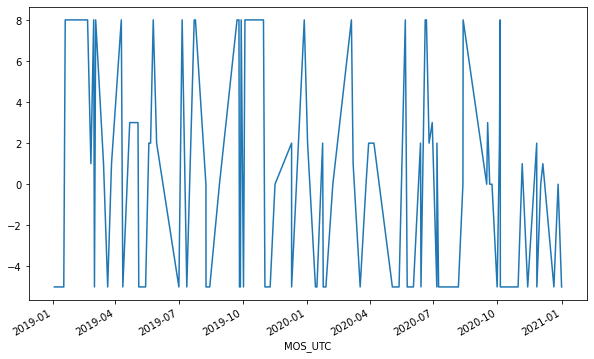

In [41]:
sales_data_viz["UTC_Offset"].plot(figsize=(10,6))

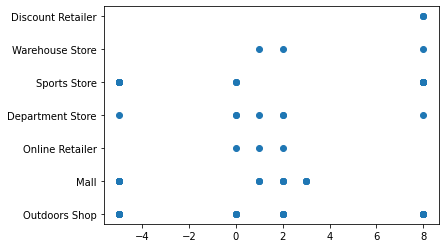

In [42]:
plt.scatter(sales_data_viz['UTC_Offset'],sales_data_viz['RetailerType'])

### Revenue by TimeZone

In [43]:
sales_data_viz_revenue = sales_data_viz.groupby(['TimeZone']).sum()
sales_data_viz_revenue

,UTC_Offset,Sales Revenue ($)
TimeZone,,
Australia/West,136.0,4642.80
CET,26.0,6651.36
EET,20.0,4693.50
EST,-200.0,9215.42
GMT,0.0,1266.51
Singapore,64.0,221.51


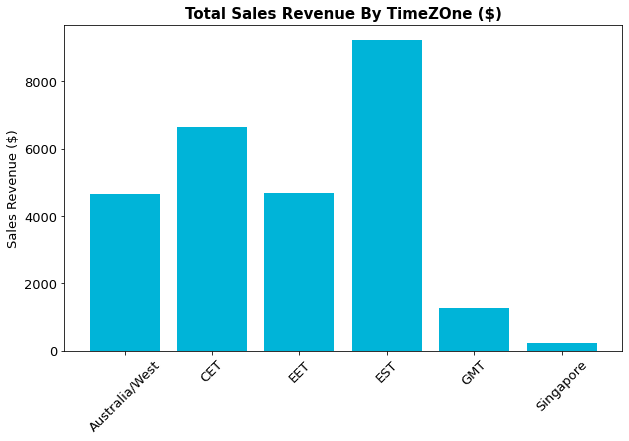

In [44]:
plt.figure(figsize=(10,6))

plt.bar(sales_data_viz_revenue.index, sales_data_viz_revenue["Sales Revenue ($)"], color='#00b4d8')

plt.xticks(rotation = 45, fontsize=13)
plt.yticks(fontsize=13)

plt.title('Total Sales Revenue By TimeZOne ($)', fontweight='bold', fontsize=15)
plt.ylabel('Sales Revenue ($)', fontsize=13)

plt.show()

In [45]:
sales_data_viz.groupby(["TimeZone"]).mean().sort_values('Sales Revenue ($)')

,UTC_Offset,Sales Revenue ($)
TimeZone,,
Singapore,8.000,27.688750
GMT,0.000,115.137273
EST,-5.000,230.385500
Australia/West,8.000,273.105882
CET,1.625,415.710000
EET,2.500,586.687500


In [46]:
avg_sales_revenue = sales_data_viz.groupby(["TimeZone"]).mean().sort_values('Sales Revenue ($)',ascending=False)
avg_sales_revenue

,UTC_Offset,Sales Revenue ($)
TimeZone,,
EET,2.500,586.687500
CET,1.625,415.710000
Australia/West,8.000,273.105882
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


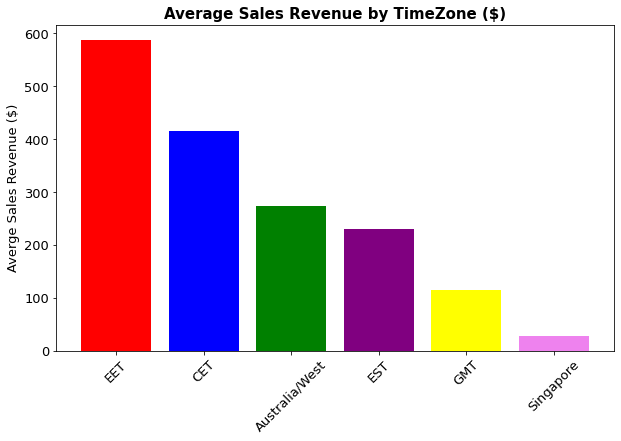

In [47]:
plt.figure(figsize=(10,6))

plt.bar(avg_sales_revenue.index,avg_sales_revenue['Sales Revenue ($)'], color=['red','blue','green','purple','yellow','violet'])
plt.xticks(rotation = 45, fontsize=13)
plt.yticks(fontsize=13)
plt.title("Average Sales Revenue by TimeZone ($)",fontweight = 'bold',fontsize=15)
plt.ylabel('Averge Sales Revenue ($)',fontsize=13)

plt.show()

In [48]:
sales_data_viz['RetailerType'].unique()

array(['Outdoors Shop', 'Mall', 'Online Retailer', 'Department Store',
       'Sports Store', 'Warehouse Store', 'Discount Retailer'],
      dtype=object)

In [49]:
retailer_sales = sales_data_viz.groupby(['RetailerType']).sum().sort_values('Sales Revenue ($)')
retailer_sales

,UTC_Offset,Sales Revenue ($)
RetailerType,,
Warehouse Store,11.0,62.11
Discount Retailer,24.0,135.00
Online Retailer,3.0,262.00
Department Store,8.0,4691.55
Outdoors Shop,12.0,4968.88
Mall,-22.0,7701.64
Sports Store,10.0,8869.92


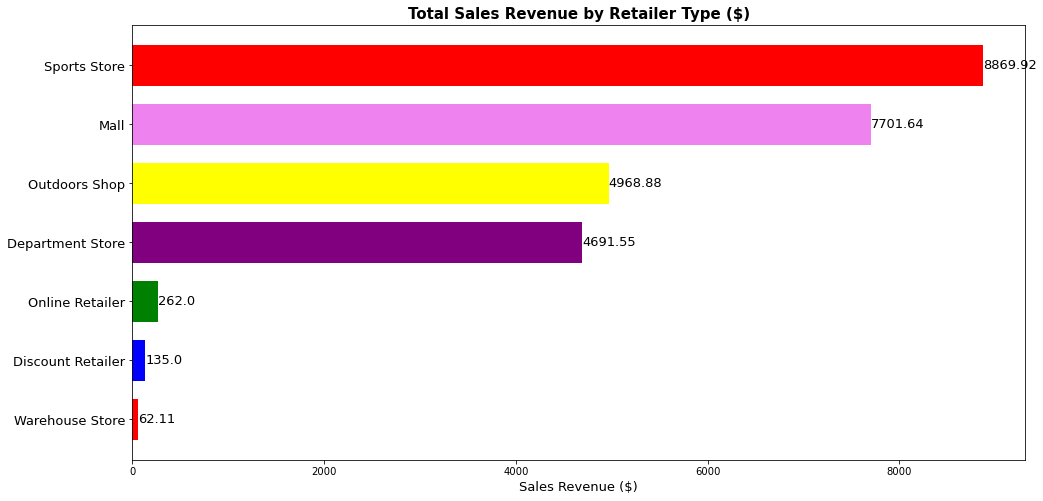

In [50]:
plt.figure(figsize=(16,8))

plt.barh(retailer_sales.index,retailer_sales['Sales Revenue ($)'], 
         color=['red','blue','green','purple','yellow','violet'],height=0.7)

for index, value in enumerate(retailer_sales['Sales Revenue ($)'].values.round(2)):
    plt.text(value, index, str(value), ha='left', va='center',fontsize=13)

plt.yticks(fontsize=13)
plt.title("Total Sales Revenue by Retailer Type ($)",fontweight = 'bold',fontsize=15)
plt.xlabel('Sales Revenue ($)',fontsize=13)

plt.show()